# RATING PREDICTION PROJECT:

### Problem Statement:

##### We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

1)Data Collection Phase:
You have to scrape at least 20000 rows of data. You can scrape more data as well, it’s up to you. more the data better the model In this section you need to scrape the reviews of different laptops, Phones, Headphones, smart watches, Professional Cameras, Printers, Monitors, Home theater, Router from different ecommerce websites. Basically, we need these columns

1) reviews of the product.
2) rating of the product.
You can fetch other data as well, if you think data can be useful or can help in the project.It completely depends on your imagination or assumption.

2)Model Building Phase:
After collecting the data, you need to build a machine learning model. Before model building do all data preprocessing steps involving NLP. Try different models with different hyper parameters and select the best model. Follow the complete life cycle of data science. Include all the steps like

1. Data Cleaning
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Building
5. Model Evaluation
6. Selecting the best model

### Importing Necessary Libraries:

In [139]:
# Preprocessing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats

# To remove outliers
from scipy.stats import zscore

#importing nltk libraries
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

# Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,roc_auc_score,hamming_loss, log_loss

# Warning
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [140]:
#Reading csv file 
df = pd.read_csv("R_P.csv")
df

,Unnamed: 0,Review_Title,Review_Text,Ratings
0,0,Display as claimed FHD is not satifactory,\n &nbsp;I have purchased #LenovoIdeapad3<br>...,2.0 out of 5 stars
1,1,Display problem,\n &nbsp;Display problem..<br>i got delivered...,2.0 out of 5 stars
2,2,Received defective product,\n Received defective product (background noi...,2.0 out of 5 stars
3,3,No lenova product can T buy no support for ...,\n Product warranty is not support and batt...,2.0 out of 5 stars
4,4,Display quality is not good,"\n The display quality is not good, the rest ...",3.0 out of 5 stars
...,...,...,...,...
108571,108571,Absolute rubbish!,"Very bad, very very bad",1.0
108572,108572,Must buy!,So happy our help,5.0
108573,108573,Good,But battery backup not good,5.0
108574,108574,Faced minor issues,not bad,3.0


I have imported the collected data which was in csv format and stored it as a dataframe. We can see the first 5 and last 5 observations of the dataset and it looks good also we have all string valued columns. In this perticular dataset we have about 108576 rows and 3 columns Unnamed: 0 is the index column of csvfile so let's drop that column. Since Ratings is my target column and it is a categorical column with 5 categories so this problem is a Multi Classification Problem.



#### Feature Information:

* Review_Title : Title of the Review.
* Review_Text : Text Content of the Review.
* Ratings : Ratings out of 5 stars.

### Exploratory Data Analysis [EDA]:

Since Unnamed: 0 is the index column of csv file so let's drop that column as it will not help us in our predictions.

In [141]:
# Dropping unnecessary column
df.drop(columns = 'Unnamed: 0',inplace = True)

In [142]:
# Checking the shape of the dataset
print("There are {} Rows and {} Columns in the dataset".format(df.shape[0], df.shape[1]))

There are 108576 Rows and 3 Columns in the dataset


So there are 108576 rows and 3 columns in the dataset.

In [143]:
# Checking the column names in the dataset
print("Columns present in the dataset are:\n",df.columns)

Columns present in the dataset are:
 Index(['Review_Title', 'Review_Text', 'Ratings'], dtype='object')


So above 3 are the column names in the dataset.

In [144]:
# Let's check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108576 entries, 0 to 108575
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_Title  92790 non-null  object
 1   Review_Text   95236 non-null  object
 2   Ratings       92792 non-null  object
dtypes: object(3)
memory usage: 2.5+ MB


By observing the info we can say that there are some null values in the dataset and all the columns are of object data type which means all the entries are string entries.

In [145]:
# Checking for null values
print("Null values in the dataset: \n", df.isnull().sum())

Null values in the dataset: 
 Review_Title    15786
Review_Text     13340
Ratings         15784
dtype: int64


So we have a huge number of nan values in the dataset. Let's replace them using imputation methods.

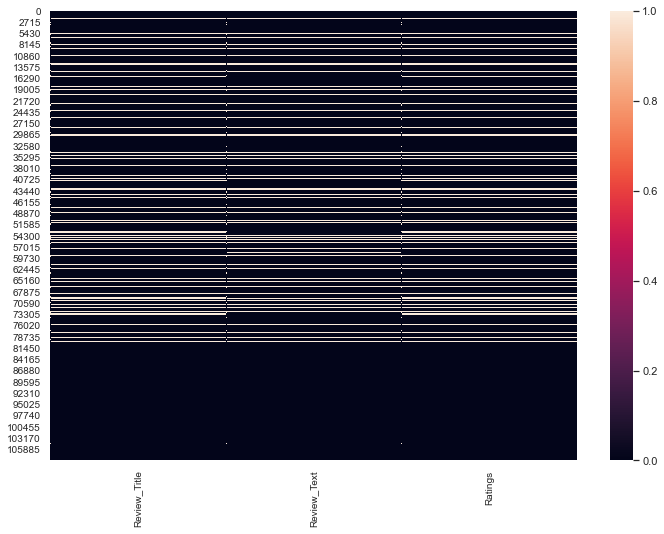

In [146]:
# Let's visualize the null values clearly in dataset using heat map
sns.set(rc={'figure.figsize':(11.8,8.27)})
sns.heatmap(data=df.isnull())
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

Now we can clear have a look on null values by using visualization

In [147]:
#Checking the mode of Review_Title column
df["Review_Title"].mode()

0    Wonderful
dtype: object

So the highest occuring Review_Title is Wonderful, we have to replace the nan values in Review_Title column with it's mode.

In [148]:
#Checking the mode of Review_Text column
df["Review_Text"].mode()

0    Good
dtype: object

So the highest occuring Review_Text is Good, we have to replace the nan values in Review_Text column with it's mode.

In [149]:
#Checking the value counts of Ratings column
df.Ratings.value_counts()

5.0                   16444
5.0 out of 5 stars    15893
1.0 out of 5 stars    13829
4.0 out of 5 stars    13690
3.0 out of 5 stars    11480
2.0 out of 5 stars    10071
4.0                    5216
1.0                    3287
3.0                    2000
2.0                     882
Name: Ratings, dtype: int64

Since the highest count in Ratings column is for 5 followed by 5.0 out of 5 starts and they both are same so it is clear the mode for Ratings column is 5.

In [150]:
#Checking the mode
df["Ratings"].mode()

0    5.0
dtype: object

In [151]:
#Replacing naa values with there mode as all the columns are categorical
df["Review_Title"] = df["Review_Title"].fillna(df["Review_Title"].mode()[0])
df["Review_Text"] = df["Review_Text"].fillna(df["Review_Text"].mode()[0])
df["Ratings"] = df["Ratings"].fillna(df["Ratings"].mode()[0])

In [152]:
# Checking for null values again
print("Null values in the dataset: \n", df.isnull().sum())

Null values in the dataset: 
 Review_Title    0
Review_Text     0
Ratings         0
dtype: int64


Now successfully we have replaced all the nan values using imputation method.


#### Let's have a look into target column:

In [153]:
# Checking the unique value count of target column
df['Ratings'].unique()

array(['2.0 out of 5 stars', '3.0 out of 5 stars', '5.0',
       '1.0 out of 5 stars', '5.0 out of 5 stars', '4.0 out of 5 stars',
       '4.0', '3.0', '1.0', '2.0'], dtype=object)

Looking the above entries in target column we came to know that we need to replace the string entries to there respective values(stars).

In [159]:
# Replacing the string entries in target column
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].astype('float')
df['Ratings'] = df['Ratings'].astype('int')

In [160]:
# Checking the unique value count of target column again
df['Ratings'].unique()

array([2, 3, 5, 1, 4])

##### Now let's combine Review_Title and Review_Text to make a single column Review:

In [161]:
# Combining Review text and title
df['Review'] = df['Review_Title'].map(str)+' '+df['Review_Text']

In [162]:
#let's have a look into our dataset
df

,Review_Title,Review_Text,Ratings,Review
0,Display as claimed FHD is not satifactory,\n &nbsp;I have purchased #LenovoIdeapad3<br>...,2,Display as claimed FHD is not satifactory \n ...
1,Display problem,\n &nbsp;Display problem..<br>i got delivered...,2,Display problem \n &nbsp;Display problem..<br...
2,Received defective product,\n Received defective product (background noi...,2,Received defective product \n Received defect...
3,No lenova product can T buy no support for ...,\n Product warranty is not support and batt...,2,No lenova product can T buy no support for ...
4,Display quality is not good,"\n The display quality is not good, the rest ...",3,Display quality is not good \n The display qu...
...,...,...,...,...
108571,Absolute rubbish!,"Very bad, very very bad",1,"Absolute rubbish! Very bad, very very bad"
108572,Must buy!,So happy our help,5,Must buy! So happy our help
108573,Good,But battery backup not good,5,Good But battery backup not good
108574,Faced minor issues,not bad,3,Faced minor issues not bad


Since we have obtained Review from Review_Title and Review_Text let's drop Review_Title and Review_Text. If not they'll create multicolinearity issue.

In [163]:
# Dropping unnecessary column
df.drop(columns = 'Review_Title',inplace = True)
df.drop(columns = 'Review_Text',inplace = True)

##### Let's have a look into our Review column and see first 2 entries how the data looks:

In [164]:
# Checking data of first row in Review column
df['Review'][0]

"Display as claimed FHD is not satifactory \n  &nbsp;I have purchased #LenovoIdeapad3<br>I am extremely disappointed to see its bad display quality. I can't see the screen clarity. It displays as white foggy and the viewing angle is very bad. I can see from a particular angle only. want to return #lenovoindia  Display as claimed FHD is not satisfactory. I am using Lenovo(T430, i5) which display is far better than this laptop. Need to return immediately\n"

In [165]:
# Checking data of second row in Review column
df['Review'][1]

'Display problem \n  &nbsp;Display problem..<br>i got delivered on Aug 30th and opened it yesterday. Seen display problem. Return window closed two days back.. need support to rectify\n'

#### Text Processing:

In [166]:
#Here I am defining a function to replace some of the contracted words to their full form and removing urls and some unwanted text 
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

In [167]:
# Changing all words to there Lowercase
df['Review'] = df['Review'].apply(lambda x : x.lower())

df['Review'] = df['Review'].apply(lambda x : decontracted(x))

# Removing punctuations
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')

#### Let's have a look into our text again:

In [168]:
# Checking data of first row in Review column again
df['Review'][0]

'display as claimed fhd is not satifactory    nbspi have purchased lenovoideapad3 i am extremely disappointed to see its bad display quality i can not see the screen clarity it displays as white foggy and the viewing angle is very bad i can see from a particular angle only want to return lenovoindia  display as claimed fhd is not satisfactory i am using lenovot430 i5 which display is far better than this laptop need to return immediately '

In [169]:
# Checking data of second row in Review column again
df['Review'][1]

'display problem    nbspdisplay problem i got delivered on aug 30th and opened it yesterday seen display problem return window closed two days back need support to rectify '

#### Removing StopWords:

In [170]:
# Removing stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [171]:
# Checking the text data again
df['Review'][0]

'display claimed fhd satifactory nbspi purchased lenovoideapad3 extremely disappointed see bad display quality see screen clarity displays white foggy viewing angle bad see particular angle want return lenovoindia display claimed fhd satisfactory using lenovot430 i5 display far better laptop need return immediately'

In [172]:
# Checking the text data again
df['Review'][1]

'display problem nbspdisplay problem got delivered aug 30th opened yesterday seen display problem return window closed two days back need support rectify'

Now we have removed all stop words from the text data.

### Lemmatization:

In [173]:
#Initialising lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

In [174]:
#Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [175]:
#defining function to lemmatize our text
def lemmatize_sentence(sentence):
    #tokenize the sentence & find the pos tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [176]:
df['Review'] = df['Review'].apply(lambda x : lemmatize_sentence(x))

In [177]:
# Checking the text data again
df['Review'][0]

'display claim fhd satifactory nbspi purchase lenovoideapad3 extremely disappointed see bad display quality see screen clarity display white foggy view angle bad see particular angle want return lenovoindia display claim fhd satisfactory use lenovot430 i5 display far well laptop need return immediately'

In [178]:
# Checking the text data again
df['Review'][1]

'display problem nbspdisplay problem get deliver aug 30th open yesterday see display problem return window close two day back need support rectify'

So now we have removed the inflectional endings and left out with the base or dictionary form of a word.

### Text Normalization - Standardization:

In [179]:
#Noice removal
def scrub_words(text):
    #remove html markup
    text = re.sub("(<.*?>)", "", text)
    #remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    #remove white space
    text = text.strip()
    return text

In [180]:
df['Review'] = df['Review'].apply(lambda x : scrub_words(x))

In [181]:
# Checking the text data again
df['Review'][0]

'display claim fhd satifactory nbspi purchase lenovoideapad extremely disappointed see bad display quality see screen clarity display white foggy view angle bad see particular angle want return lenovoindia display claim fhd satisfactory use lenovot i display far well laptop need return immediately'

In [182]:
# Checking the text data again
df['Review'][1]

'display problem nbspdisplay problem get deliver aug th open yesterday see display problem return window close two day back need support rectify'

Finally I have defined a function scrub_words for removing the noise from the text. It will remove any html markups, digits and white spaces from the text.

Now We did all the text-processing steps and got required input for our model. We will get into Visualization part now.

## Visualization:

### i) Word Counts:

In [183]:
# Creating column for word counts in the text
df['Review_WordCount'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WordCount','Review']].head()

,Review_WordCount,Review
0,42,display claim fhd satifactory nbspi purchase l...
1,22,display problem nbspdisplay problem get delive...
2,13,receive defective product receive defective pr...
3,12,lenova product buy support costumer service pr...
4,9,display quality good display quality good rest...


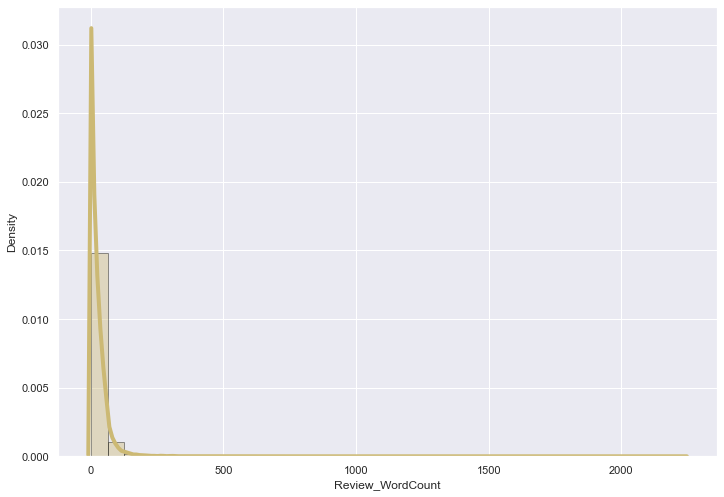

In [184]:
# density plot and histogram of Review word count
sns.distplot(df['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

By observing the histogram we can clearly see that most of our text is having the number of words in the range of 0 to 200, But some of the reviews are too lengthy which may act like outliers in our data.

### ii) Character count:

In [185]:
# Creating column for character counts in the text
df['Review_ChaCount'] = df['Review'].str.len()
df[['Review_ChaCount','Review']].head()

,Review_ChaCount,Review
0,297,display claim fhd satifactory nbspi purchase l...
1,143,display problem nbspdisplay problem get delive...
2,106,receive defective product receive defective pr...
3,87,lenova product buy support costumer service pr...
4,57,display quality good display quality good rest...


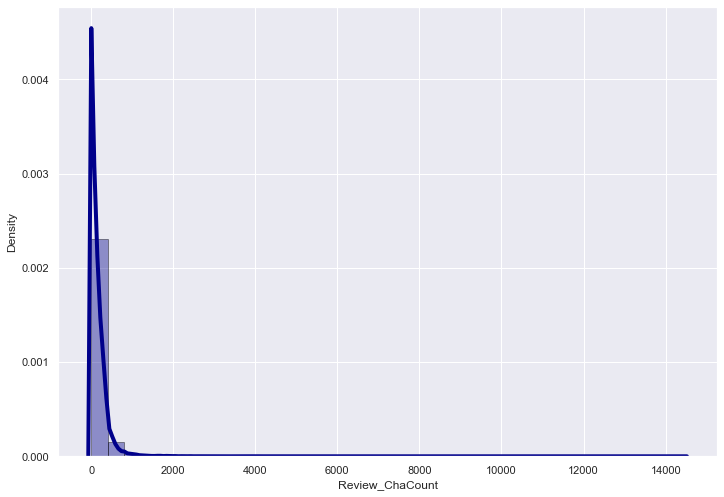

In [186]:
# density plot and histogram of all character count
sns.distplot(df['Review_ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Above plot represents histogram for character count of Review text, which is quite similar to the histogram of word count.

## Removing Outliers:

As we know that some of the review are too lengthy, so i have to treat them as outliers and remove them using z_score method.

In [187]:
#Checking the shape of the dataset
df.shape

(108576, 4)

In [188]:
# Applying zscore to remove outliers
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Review_WordCount']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape

(107095, 4)

Great by removing the outliers we are loosing 1.3% of data which is very less and it is in acceptable range.

#### Plotting histograms for word count and character counts again after removing outliers:

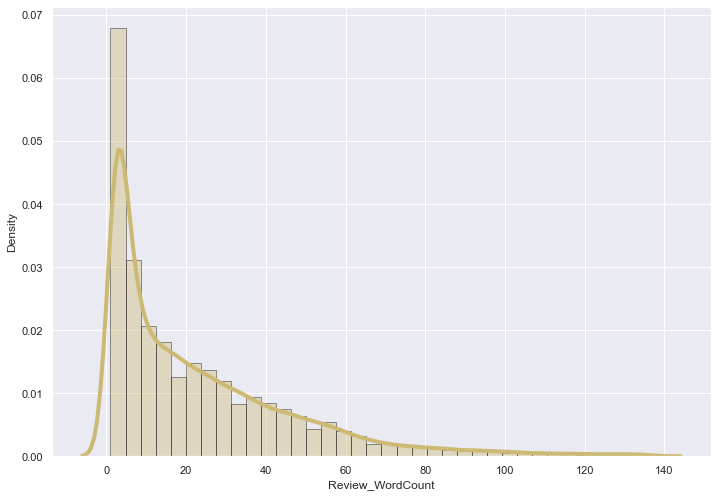

In [189]:
# density plot and histogram of Review word count
sns.distplot(df['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

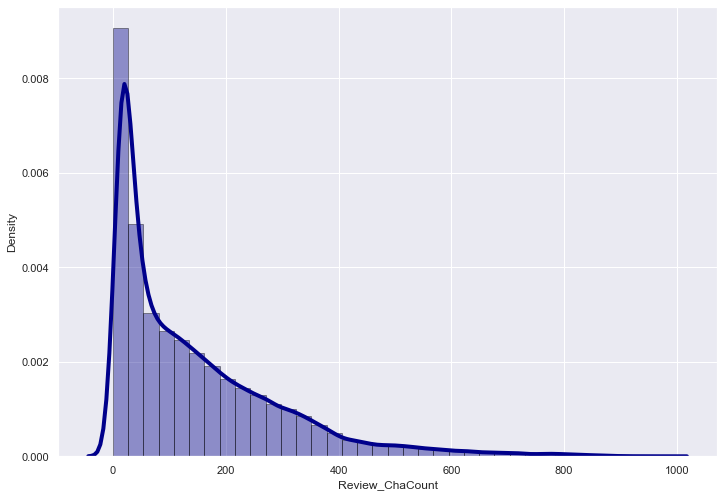

In [190]:
# density plot and histogram of all character count
sns.distplot(df['Review_ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

After plotting histograms for word counts and character counts and after removing outliers we can see we are left out with good range of number of words and characters.

### iii) Top 30 most frequently occuring words:

In [191]:
#function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

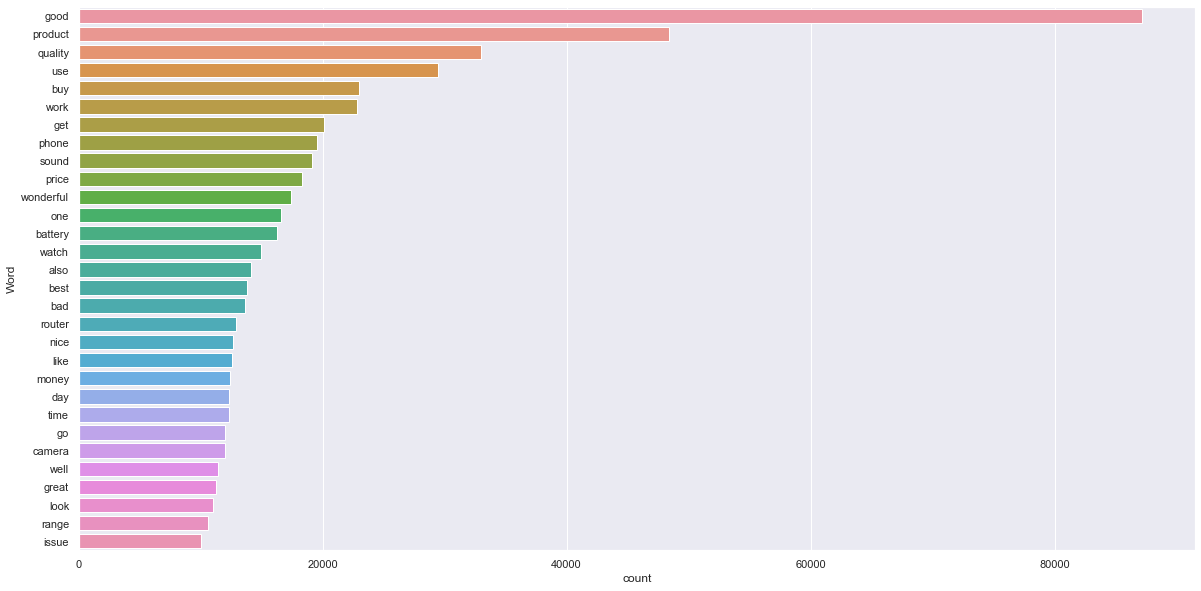

In [192]:
freq_words(df['Review'])

By seeing the above plot we can see that Good, prodout, quality......are occurring frequently.

### iv) Top 30 Rare words:

In [193]:
#function to plot least frequent terms
def rare_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nsmallest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

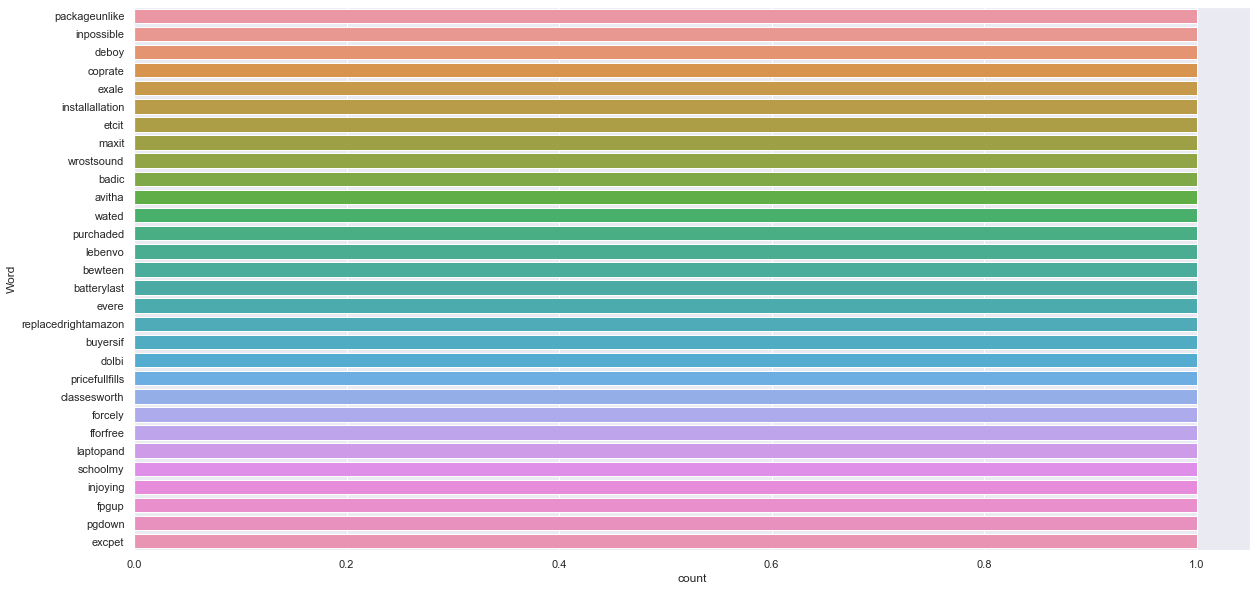

In [194]:
rare_words(df['Review'])

Above list of words are have rare occurance in Review.

### v) Word cloud:

In [195]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
                    background_color='white',
                    stopwords = stopwords,
                    max_words = 500,
                    max_font_size = 40,
                    scale = 3,
                    random_state = 1).generate(str(data))
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

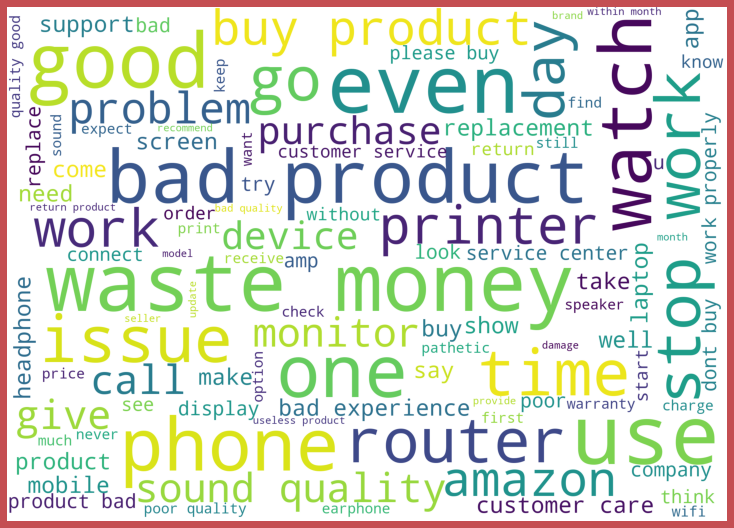

In [196]:
#Let's plot the loud words with Rating 1
from wordcloud import WordCloud

df1=df['Review'][df['Ratings']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

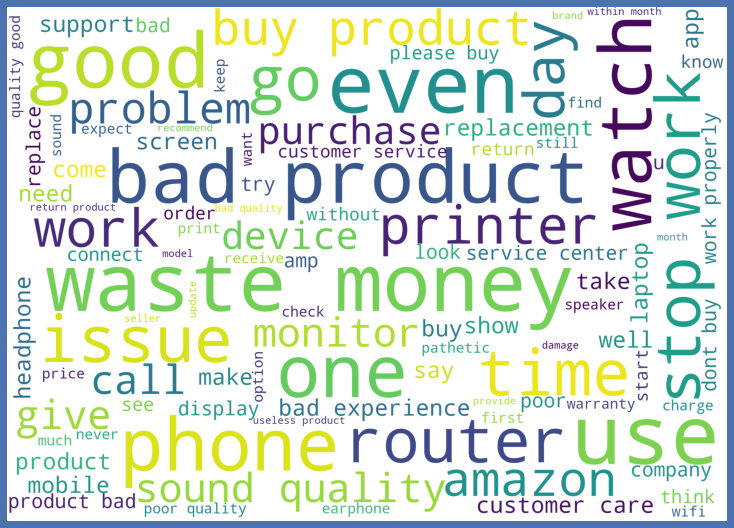

In [197]:
#Let's plot the loud words with Rating 2
from wordcloud import WordCloud

df2=df['Review'][df['Ratings']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

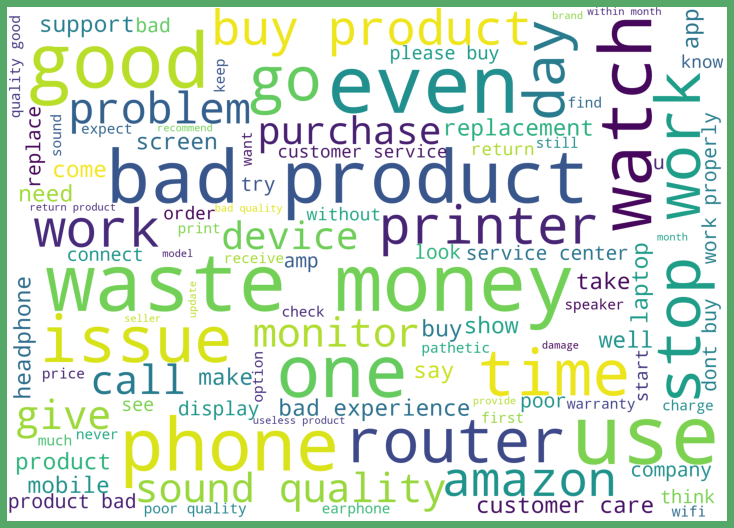

In [198]:
#Let's plot the loud words with Rating 3
from wordcloud import WordCloud

df3=df['Review'][df['Ratings']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

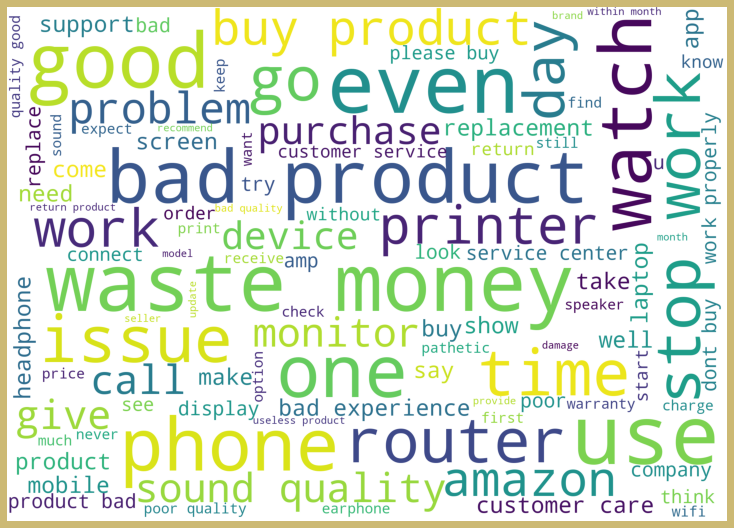

In [199]:
#Let's plot the loud words with Rating 4
from wordcloud import WordCloud

df4=df['Review'][df['Ratings']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='y')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

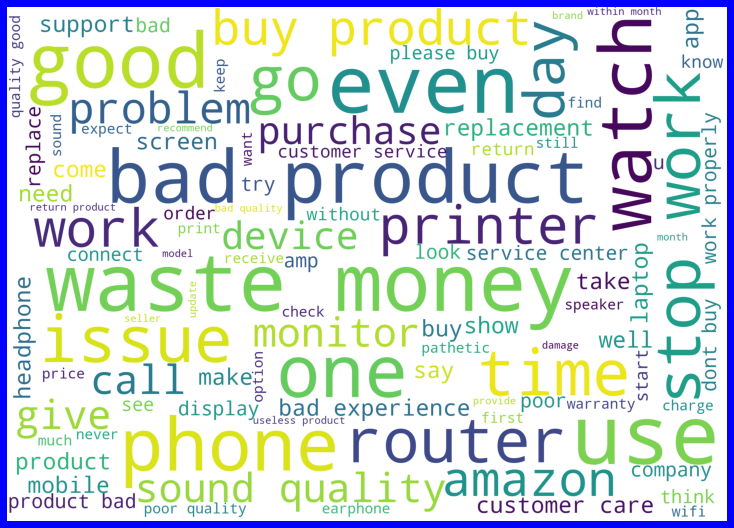

In [200]:
#Let's plot the loud words with Rating 5
from wordcloud import WordCloud

df5=df['Review'][df['Ratings']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='blue')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

#### Observations:

* From the above plots we can clearly see the words which are indication of Reviewer's opinion on products.
* Here most frequent words used for each Rating is displayed in the word cloud.


In [201]:
#Checking the value counts of Ratings column
df.Ratings.value_counts()

5    47360
4    18580
1    16974
3    13324
2    10857
Name: Ratings, dtype: int64

## Model Building and Evaluation:

In [202]:
# Separating feature and label
x = df['Review']
y = df['Ratings']

## Converting text data into vectors using Tfidf Vectorizer:

In [203]:
#using the n_gram tfidf vectorizer(Word vectors)
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [204]:
#Character vectorizer
char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

In [205]:
#I will combine both word vectors and character vectors as input for our model
from scipy.sparse import hstack
train_features = hstack([train_char_features,train_word_features])

## Splitting the data into train and test:

In [206]:
# Splitting train and test data
seed = 1
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.25, random_state = seed)


## Data Balancing:

In [207]:
#lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (80321, 150000)
x_test (26774, 150000)
y_train (80321,)
y_test (26774,)


Now let's do oversmapling in order to make data balanced.

In [208]:
#Checking the value counts of Ratings column
y.value_counts()

5    47360
4    18580
1    16974
3    13324
2    10857
Name: Ratings, dtype: int64

In [209]:
#Checking the number of classes before fit
from collections import Counter
print("The number of classes before fit{}".format(Counter(y_train)))

The number of classes before fitCounter({5: 35602, 4: 13957, 1: 12738, 3: 9914, 2: 8110})


So we have maximum count 35602 for 5ratings hence will over sample mannually all the ratings to the mark 35602.

In [211]:
# Oversample and plot imbalanced dataset with SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# transforming the dataset
os=SMOTE(sampling_strategy = {1: 35602, 2: 35602, 3: 35602, 4: 35602, 5: 35602})
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)

print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 35602, 4: 13957, 1: 12738, 3: 9914, 2: 8110})
The number of classes after fit Counter({5: 35602, 1: 35602, 3: 35602, 4: 35602, 2: 35602})


So now we have successfully balanced the data. Let's proceed with model building.

In [213]:
# Importing libraries for ML Algorithms
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [214]:
# defining the algorithms
rf = RandomForestClassifier()
DTC = DecisionTreeClassifier()
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
bnb = BernoulliNB()
xgb = XGBClassifier(verbosity=0)
lgb = LGBMClassifier()
sgd = SGDClassifier()

In [215]:
#creating a function to train and test the model with evaluation
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train_ns,y_train_ns)
    y_pred = model.predict(x_train_ns)
    pred = model.predict(x_test)

    accuracy = accuracy_score(y_test,pred)*100

    print(f"Accuracy Score:", accuracy)
    print("---------------------------------------------------")

    #confusion matrix & classification report
    
    print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
    print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

In [216]:
# Running multiple algorithms
for model in [lr,svc,DTC,sgd,rf,xgb]:
    BuiltModel(model)

******************************LogisticRegression******************************
Accuracy Score: 74.02704115933368
---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.74      0.78      0.76      4236
           2       0.51      0.52      0.52      2747
           3       0.55      0.57      0.56      3410
           4       0.61      0.68      0.64      4623
           5       0.92      0.85      0.89     11758

    accuracy                           0.74     26774
   macro avg       0.67      0.68      0.67     26774
weighted avg       0.75      0.74      0.74     26774

Confusion Matrix : 
 [[ 3309   565   257    72    33]
 [  625  1424   494   158    46]
 [  311   463  1950   526   160]
 [  113   184   587  3132   607]
 [  134   131   272  1216 10005]]

******************************LinearSVC******************************
Accuracy Score: 78.60984537237618
----------------------------

I have created 6 different classification algorithms. Great, among all these algorithms all are giving good accuracies.

## Cross validation score:

In [217]:
# Defning function cross_val to find cv score of models
def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score :", scores)

In [218]:
for model in [lr,svc,DTC,sgd,rf,xgb]:
    cross_val(model)

******************************LogisticRegression******************************
Cross validation score : 58.68995478723081
******************************LinearSVC******************************
Cross validation score : 57.57786320331532
******************************DecisionTreeClassifier******************************
Cross validation score : 51.9314658591258
******************************SGDClassifier******************************
Cross validation score : 59.56579754342415
******************************RandomForestClassifier******************************
Cross validation score : 59.45935368489431
******************************XGBClassifier******************************
Cross validation score : 58.77678871013813


Great all our algorithms are giving good cv scores.Among these algorithms I am selecting SGD Classifier as best fitting algorithm for our final model as it is giving least difference between accuracy and cv score.

## HyperParameter Tuning:

In [219]:
# let's selects different parameters for tuning
grid_params = {
                'penalty':['l2','l1','elasticnet'],
                'loss':['hinge','squared_hinge'],
                'n_jobs':[-1,1]
                }

In [220]:
# Training the model with the given parameters using GridSearchCV
GCV =  GridSearchCV(sgd, grid_params, cv = 3, verbose=10)
GCV.fit(x_train_ns,y_train_ns)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START loss=hinge, n_jobs=-1, penalty=l2..........................
[CV 1/3; 1/12] END ........loss=hinge, n_jobs=-1, penalty=l2; total time=17.5min
[CV 2/3; 1/12] START loss=hinge, n_jobs=-1, penalty=l2..........................
[CV 2/3; 1/12] END ........loss=hinge, n_jobs=-1, penalty=l2; total time=  14.4s
[CV 3/3; 1/12] START loss=hinge, n_jobs=-1, penalty=l2..........................
[CV 3/3; 1/12] END ........loss=hinge, n_jobs=-1, penalty=l2; total time=  15.0s
[CV 1/3; 2/12] START loss=hinge, n_jobs=-1, penalty=l1..........................
[CV 1/3; 2/12] END ........loss=hinge, n_jobs=-1, penalty=l1; total time=  26.1s
[CV 2/3; 2/12] START loss=hinge, n_jobs=-1, penalty=l1..........................
[CV 2/3; 2/12] END ........loss=hinge, n_jobs=-1, penalty=l1; total time=  25.4s
[CV 3/3; 2/12] START loss=hinge, n_jobs=-1, penalty=l1..........................
[CV 3/3; 2/12] END ........loss=hinge, n_jobs=-1

GridSearchCV(cv=3, estimator=SGDClassifier(),
             param_grid={'loss': ['hinge', 'squared_hinge'], 'n_jobs': [-1, 1],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             verbose=10)

In [221]:
# Printing the best parameters found by GridSearchCV
GCV.best_params_

{'loss': 'hinge', 'n_jobs': 1, 'penalty': 'l2'}

## Final Model:

In [222]:
# Training our final model with above best parameters
model = SGDClassifier(loss = 'squared_hinge', n_jobs = -1, penalty = 'l1')
model.fit(x_train_ns,y_train_ns) #fitting data to model
pred = model.predict(x_test)
accuracy = accuracy_score(y_test,pred)*100

# Printing accuracy score
print("Accuracy Score :", accuracy)

# Printing Confusion matrix
print(f"\nConfusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

# Printing Classification report
print(f"\nCLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

Accuracy Score : 70.6842459102114

Confusion Matrix : 
 [[ 2978   588   346   186   138]
 [  572  1345   416   253   161]
 [  318   412  1745   596   339]
 [  169   252   509  2762   931]
 [  163   172   350   978 10095]]


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.71      0.70      0.71      4236
           2       0.49      0.49      0.49      2747
           3       0.52      0.51      0.52      3410
           4       0.58      0.60      0.59      4623
           5       0.87      0.86      0.86     11758

    accuracy                           0.71     26774
   macro avg       0.63      0.63      0.63     26774
weighted avg       0.71      0.71      0.71     26774



## Model Saving:

In [223]:
import joblib
joblib.dump(model,"Ratings_RP.pkl")

['Ratings_RP.pkl']

Finally I have saved the model into .pkl file.

## Conclusion:

### Key findings of the study :

* In this project I have collected data of reviews and ratings for different products from amazon.in and flipkart.com.
* Then I have done different text processing for reviews column and chose equal number of text from each rating class to eliminate problem of imbalance.
* By doing different EDA steps I have analyzed the text. We have checked frequently occurring words in our data as well as rarely occurring words.
* After all these steps I have built function to train different algorithms and using various evaluation metrics I have selected SGDClassifier for our final model.
* Finally by doing hyperparameter tuning we got optimum parameters for our final model. And finally we got good accuracy score for our final model.

### Limitations of this work and scope for the future work :

As we know the content of text in reviews is totally depends on the reviewer and they may rate differently which is totally depends on that particular person. So it is difficult to predict ratings based on the reviews with higher accuracies. Still we can improve our accuracy by fetching more data and by doing extensive hyperparameter tuning.